# Easi, EG48, raw proteins

Sample description: 
- Diagnosis: AML
- BM blasts: 35%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [3]:
adata.obs['batch_group'] 

GTAGTACCAATCCTTT-1-s4d1    Neurips
CTCAAGAGTCACAGAG-1-s4d1    Neurips
CTGTGGGTCATGCGGC-1-s4d1    Neurips
CGTGATAGTTATCTGG-1-s4d1    Neurips
AGATCCAAGATCGGTG-1-s4d1    Neurips
                            ...   
TTTGTCAGTCATGCAT-1-17        Caron
TTTGTCAGTGCTTCTC-1-17        Caron
TTTGTCAGTGGACGAT-1-17        Caron
TTTGTCATCAACGAAA-1-17        Caron
TTTGTCATCTAACTGG-1-17        Caron
Name: batch_group, Length: 298991, dtype: category
Categories (5, object): ['Caron', 'Easi', 'Granja', 'Neurips', 'Seurat']

In [4]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

adata_easi

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [5]:
adata_easi.obs['POOL'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [6]:
adata_easi.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [7]:
#select sample from Easigenomics dataset

adata_sample=adata_easi[adata_easi.obs['POOL'] == 'EG48']

In [8]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 1734 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [9]:
adata_sample.obs['new_cell_type'].unique().tolist()

['leukemic', 'leukemic?', 'non-leukemic', 'NK']

In [10]:
adata_sample.obs['POOL'].unique().tolist()

['EG48']

In [11]:
#Select only NK- and T-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [12]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 57 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [13]:
adata_nk.obs['cell_type']

AAGTCTGTCGCGATCG-1-105    NKT
ACGATGTCACAACGTT-1-105    NKT
ACGGGCTGTTAAAGTG-1-105    NKT
ACTTGTTGTCAAAGCG-1-105    NKT
ACTTTCATCGACCAGC-1-105    NKT
AGGTCCGGTCAGTGGA-1-105    NKT
AGTTGGTAGGCATTGG-1-105    NKT
ATCTACTAGTGATCGG-1-105    NKT
ATTGGTGTCAACACCA-1-105    NKT
CACCACTCACACCGAC-1-105    NKT
CACTCCATCTCAACTT-1-105    NKT
CAGCATAGTCCAGTGC-1-105    NKT
CAGTCCTAGGACGAAA-1-105    NKT
CATCCACAGAGGTACC-1-105    NKT
CCATGTCCAGCGAACA-1-105    NKT
CGAACATAGCAATATG-1-105    NKT
CGAACATAGTCACGCC-1-105    NKT
CGAATGTGTCTGCAAT-1-105    NKT
CGGCTAGAGCGCTTAT-1-105    NKT
CGGGTCAGTGCACCAC-1-105    NKT
CGGTTAATCACCCTCA-1-105    NKT
CGTGTCTTCAAGATCC-1-105    NKT
CTAACTTCAGCTATTG-1-105    NKT
CTAATGGGTTCACCTC-1-105    NKT
CTACATTGTCTCTCTG-1-105    NKT
CTACCCACAATCTACG-1-105    NKT
CTAGTGAAGGCTCATT-1-105    NKT
CTCAGAAAGCGTGAGT-1-105    NKT
GAATAAGTCAACACCA-1-105    NKT
GACCTGGCATCCAACA-1-105    NKT
GACGTTATCGCTTAGA-1-105    NKT
GAGCAGATCAATACCG-1-105    NKT
GCGACCAGTGTTGAGG-1-105    NKT
GGACAGACAT

In [14]:
#surface protein expression of NK- and T-cells
nk_prot=adata_nk.obsm['protein_expression']

In [15]:
#surface protein expression of whole sample
prot=adata_sample.obsm['protein_expression']

In [16]:
#NK- and T-cells in sample
nk_prot.shape

(57, 141)

In [17]:
#All cells in sample

prot.shape

(1734, 141)

In [18]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [19]:
#To exclude columns that contain only zeros from NK-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [20]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [21]:
#sorting by mean, NK- and T-cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 1734 cells in the sample


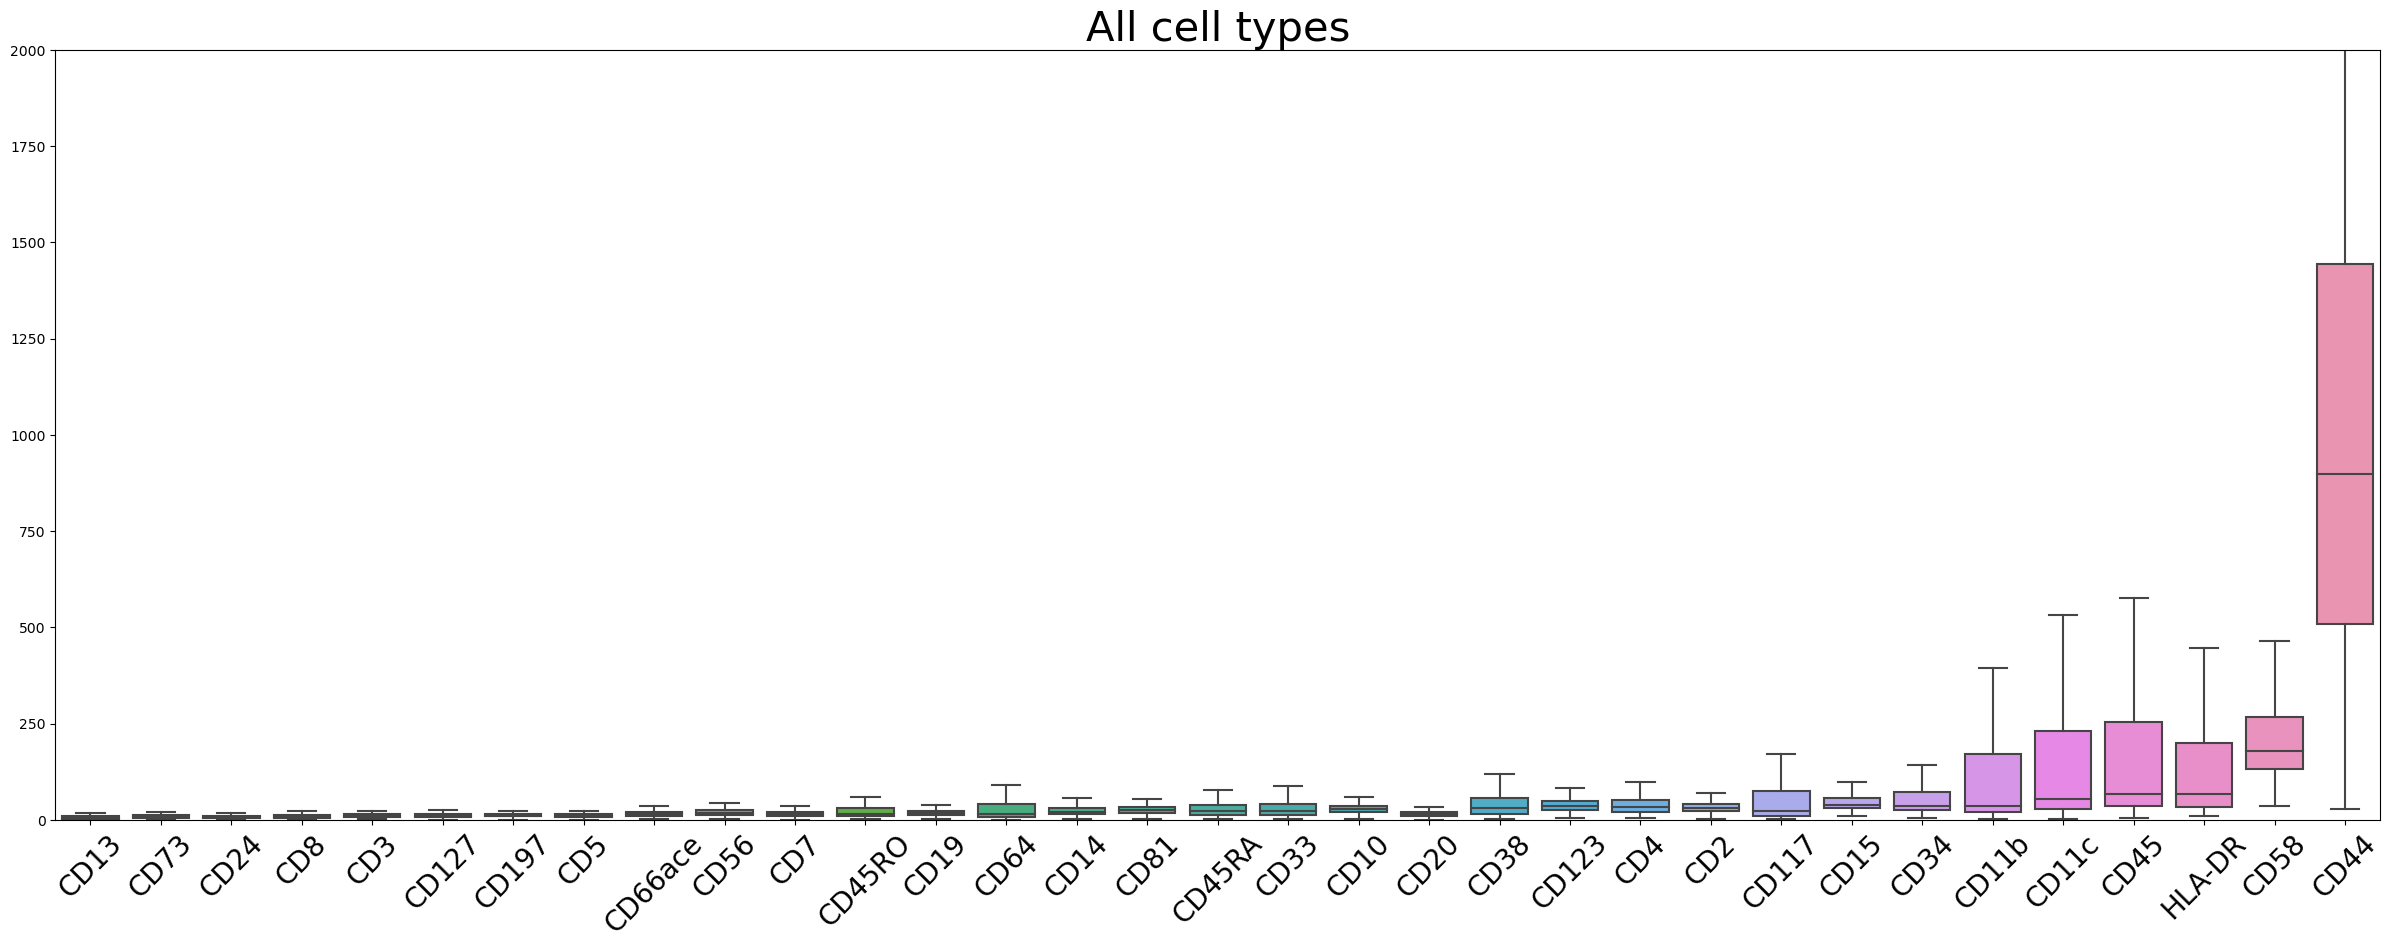

In [22]:
#All cell types

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 2000)
a=sns.boxplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)




In total: 57 NK- and T-cells in the sample


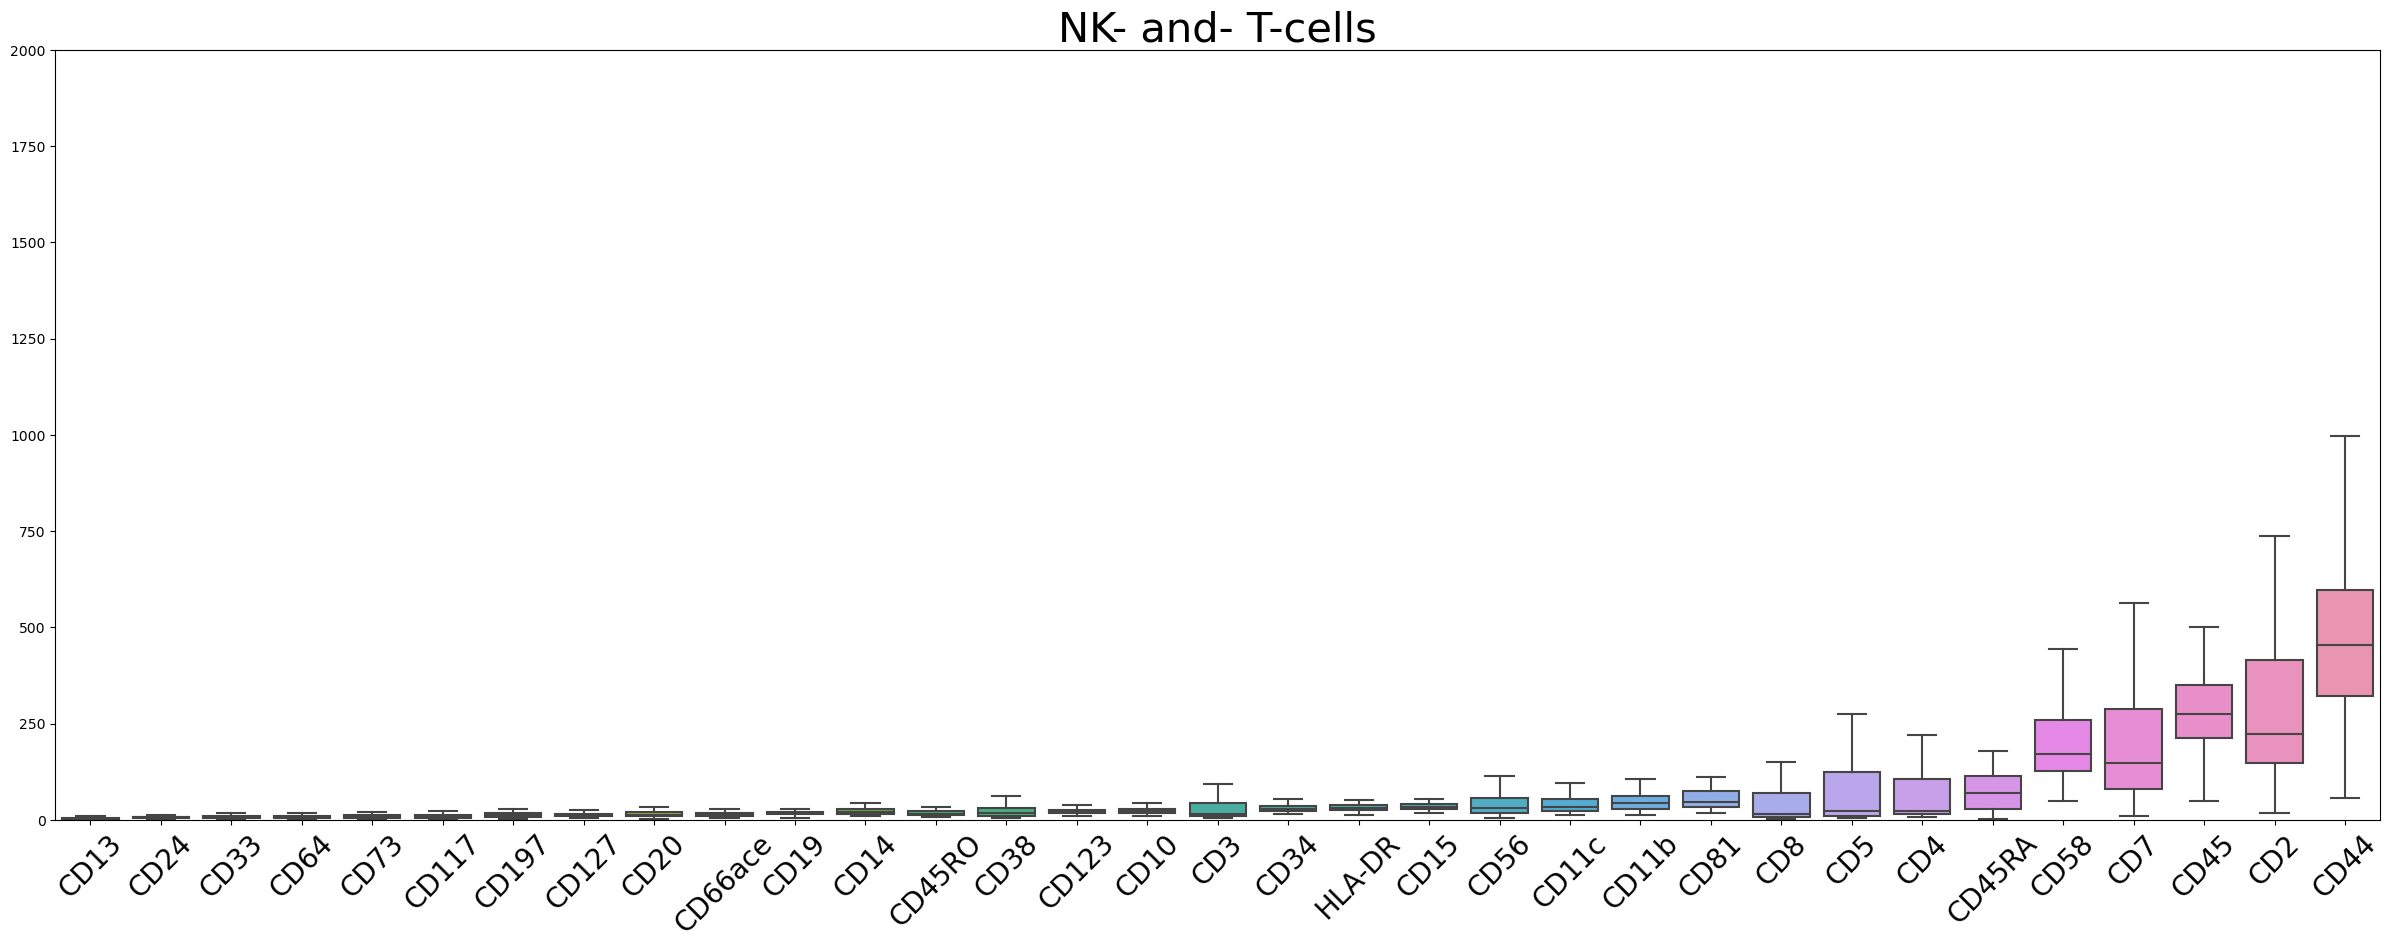

In [23]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 2000)
a=sns.boxplot(data=df_sorted_nk,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and- T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)


In total: 1734 cells in the sample


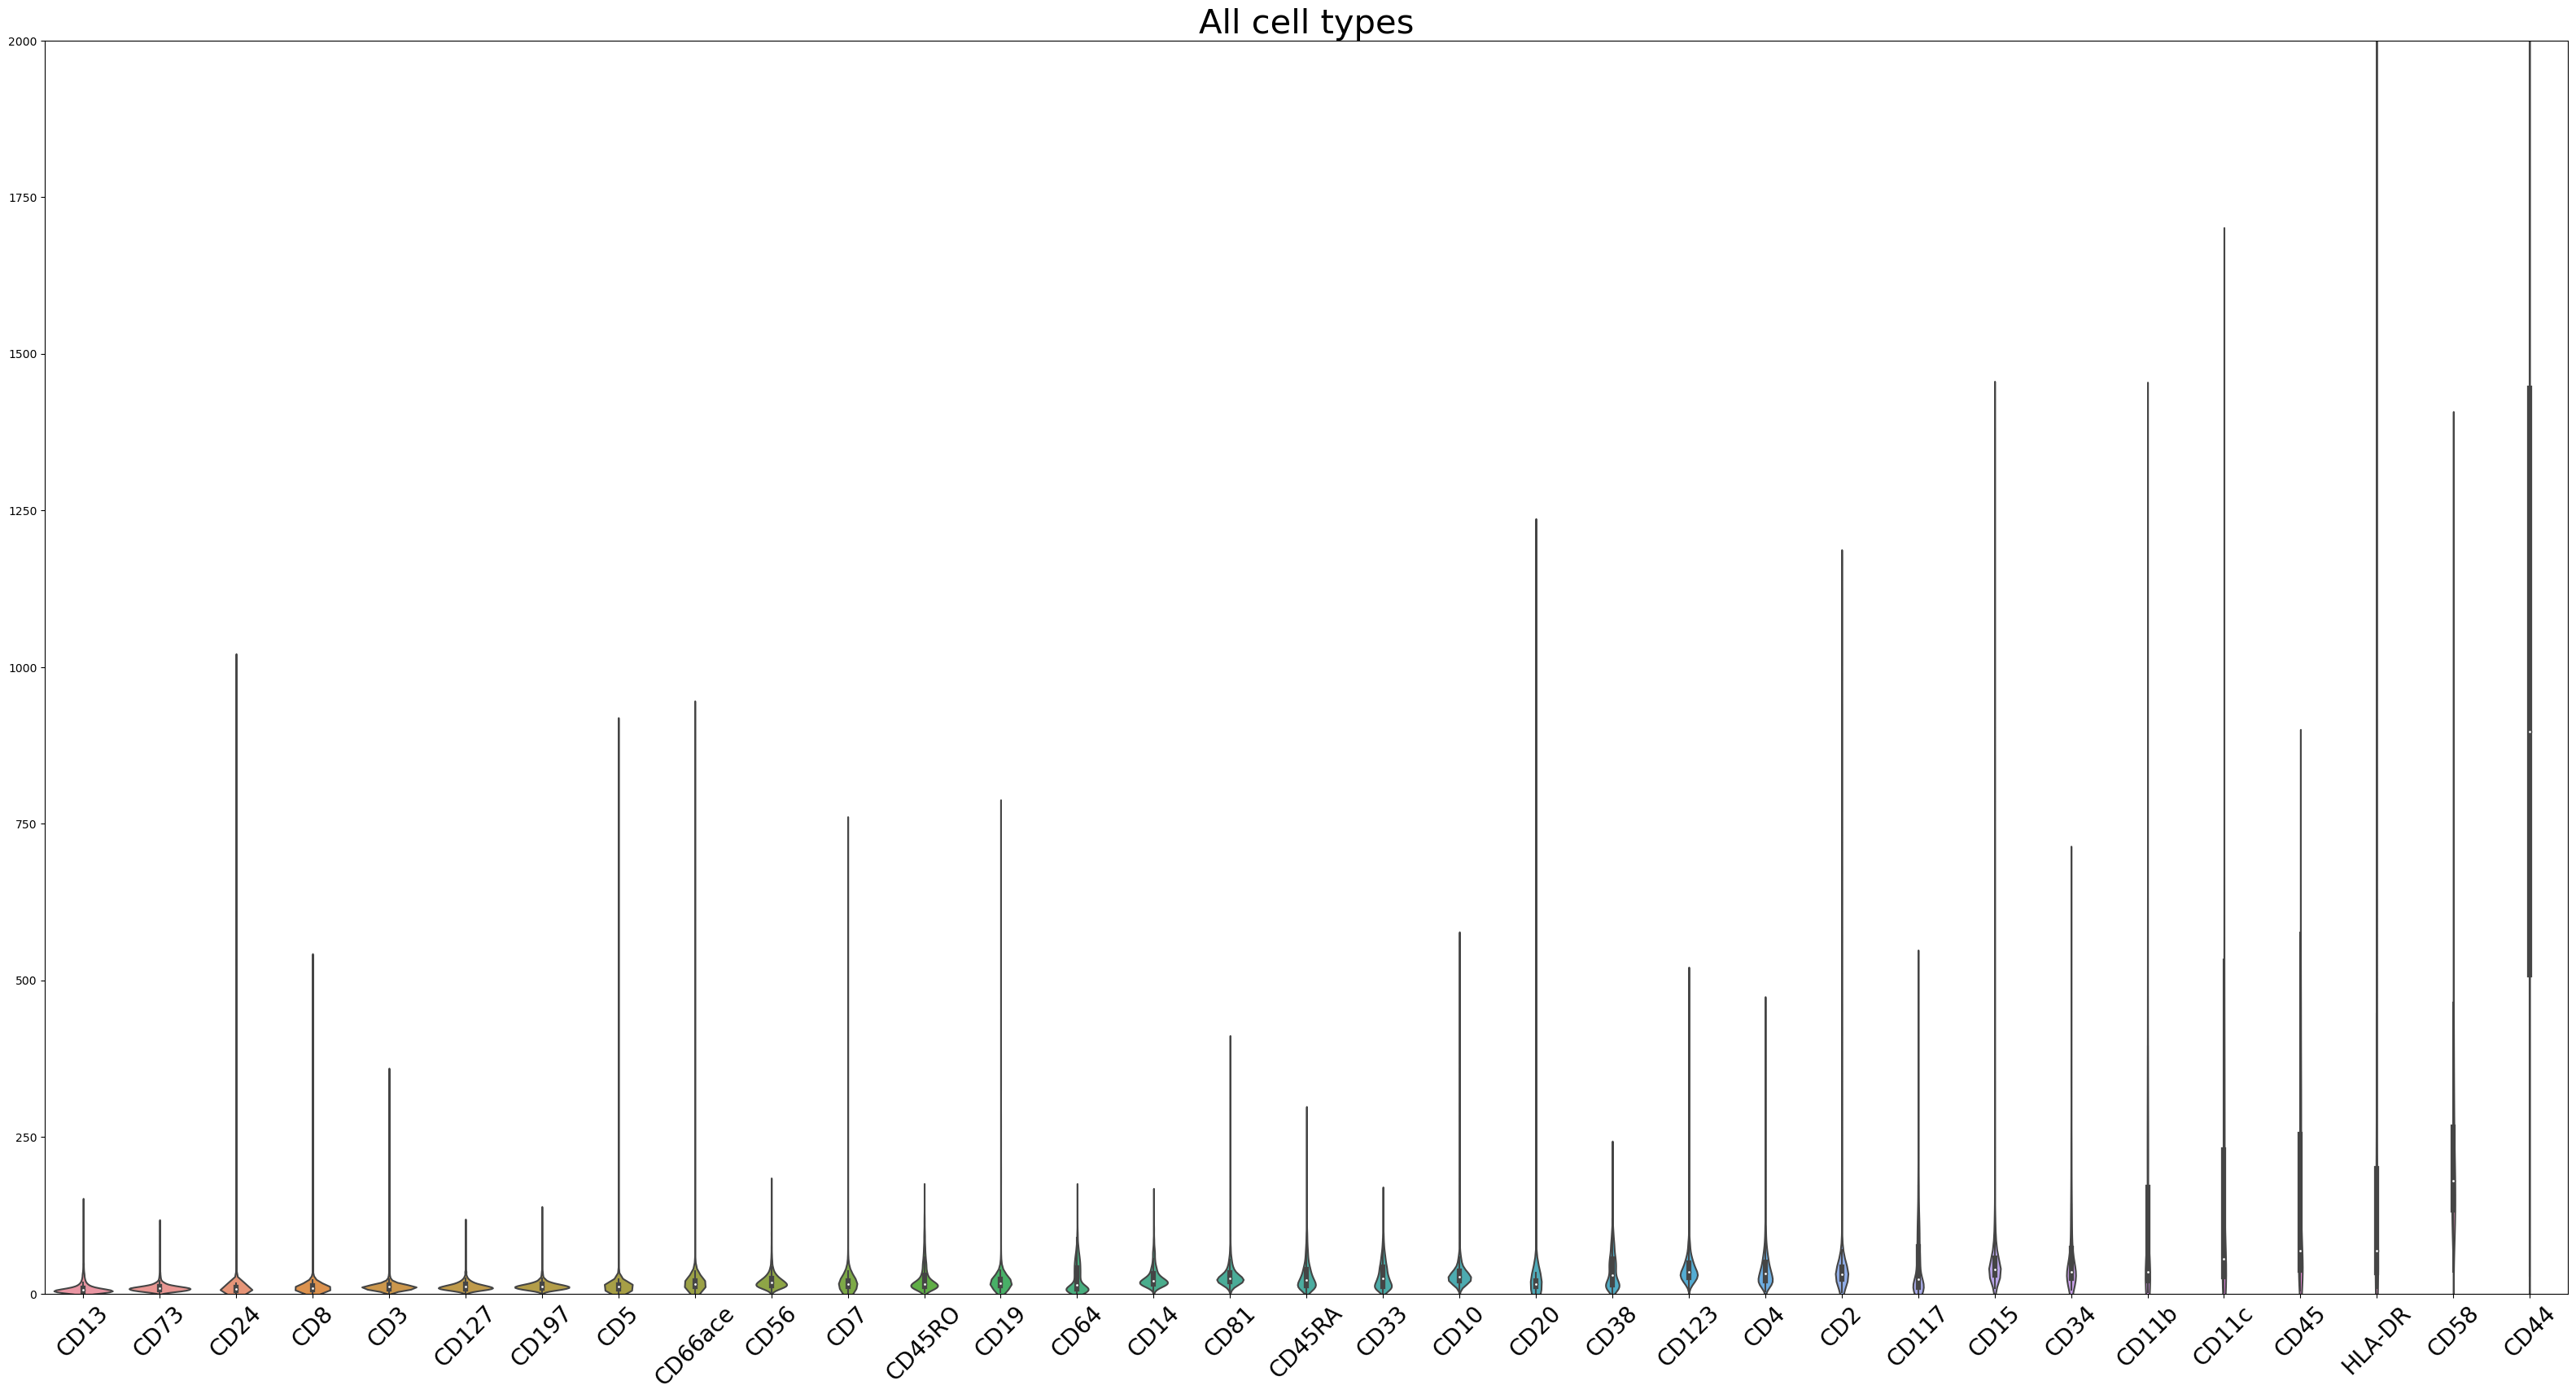

In [24]:
#All cells

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 2000)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

In total: 57 NK- and T-cells in the sample


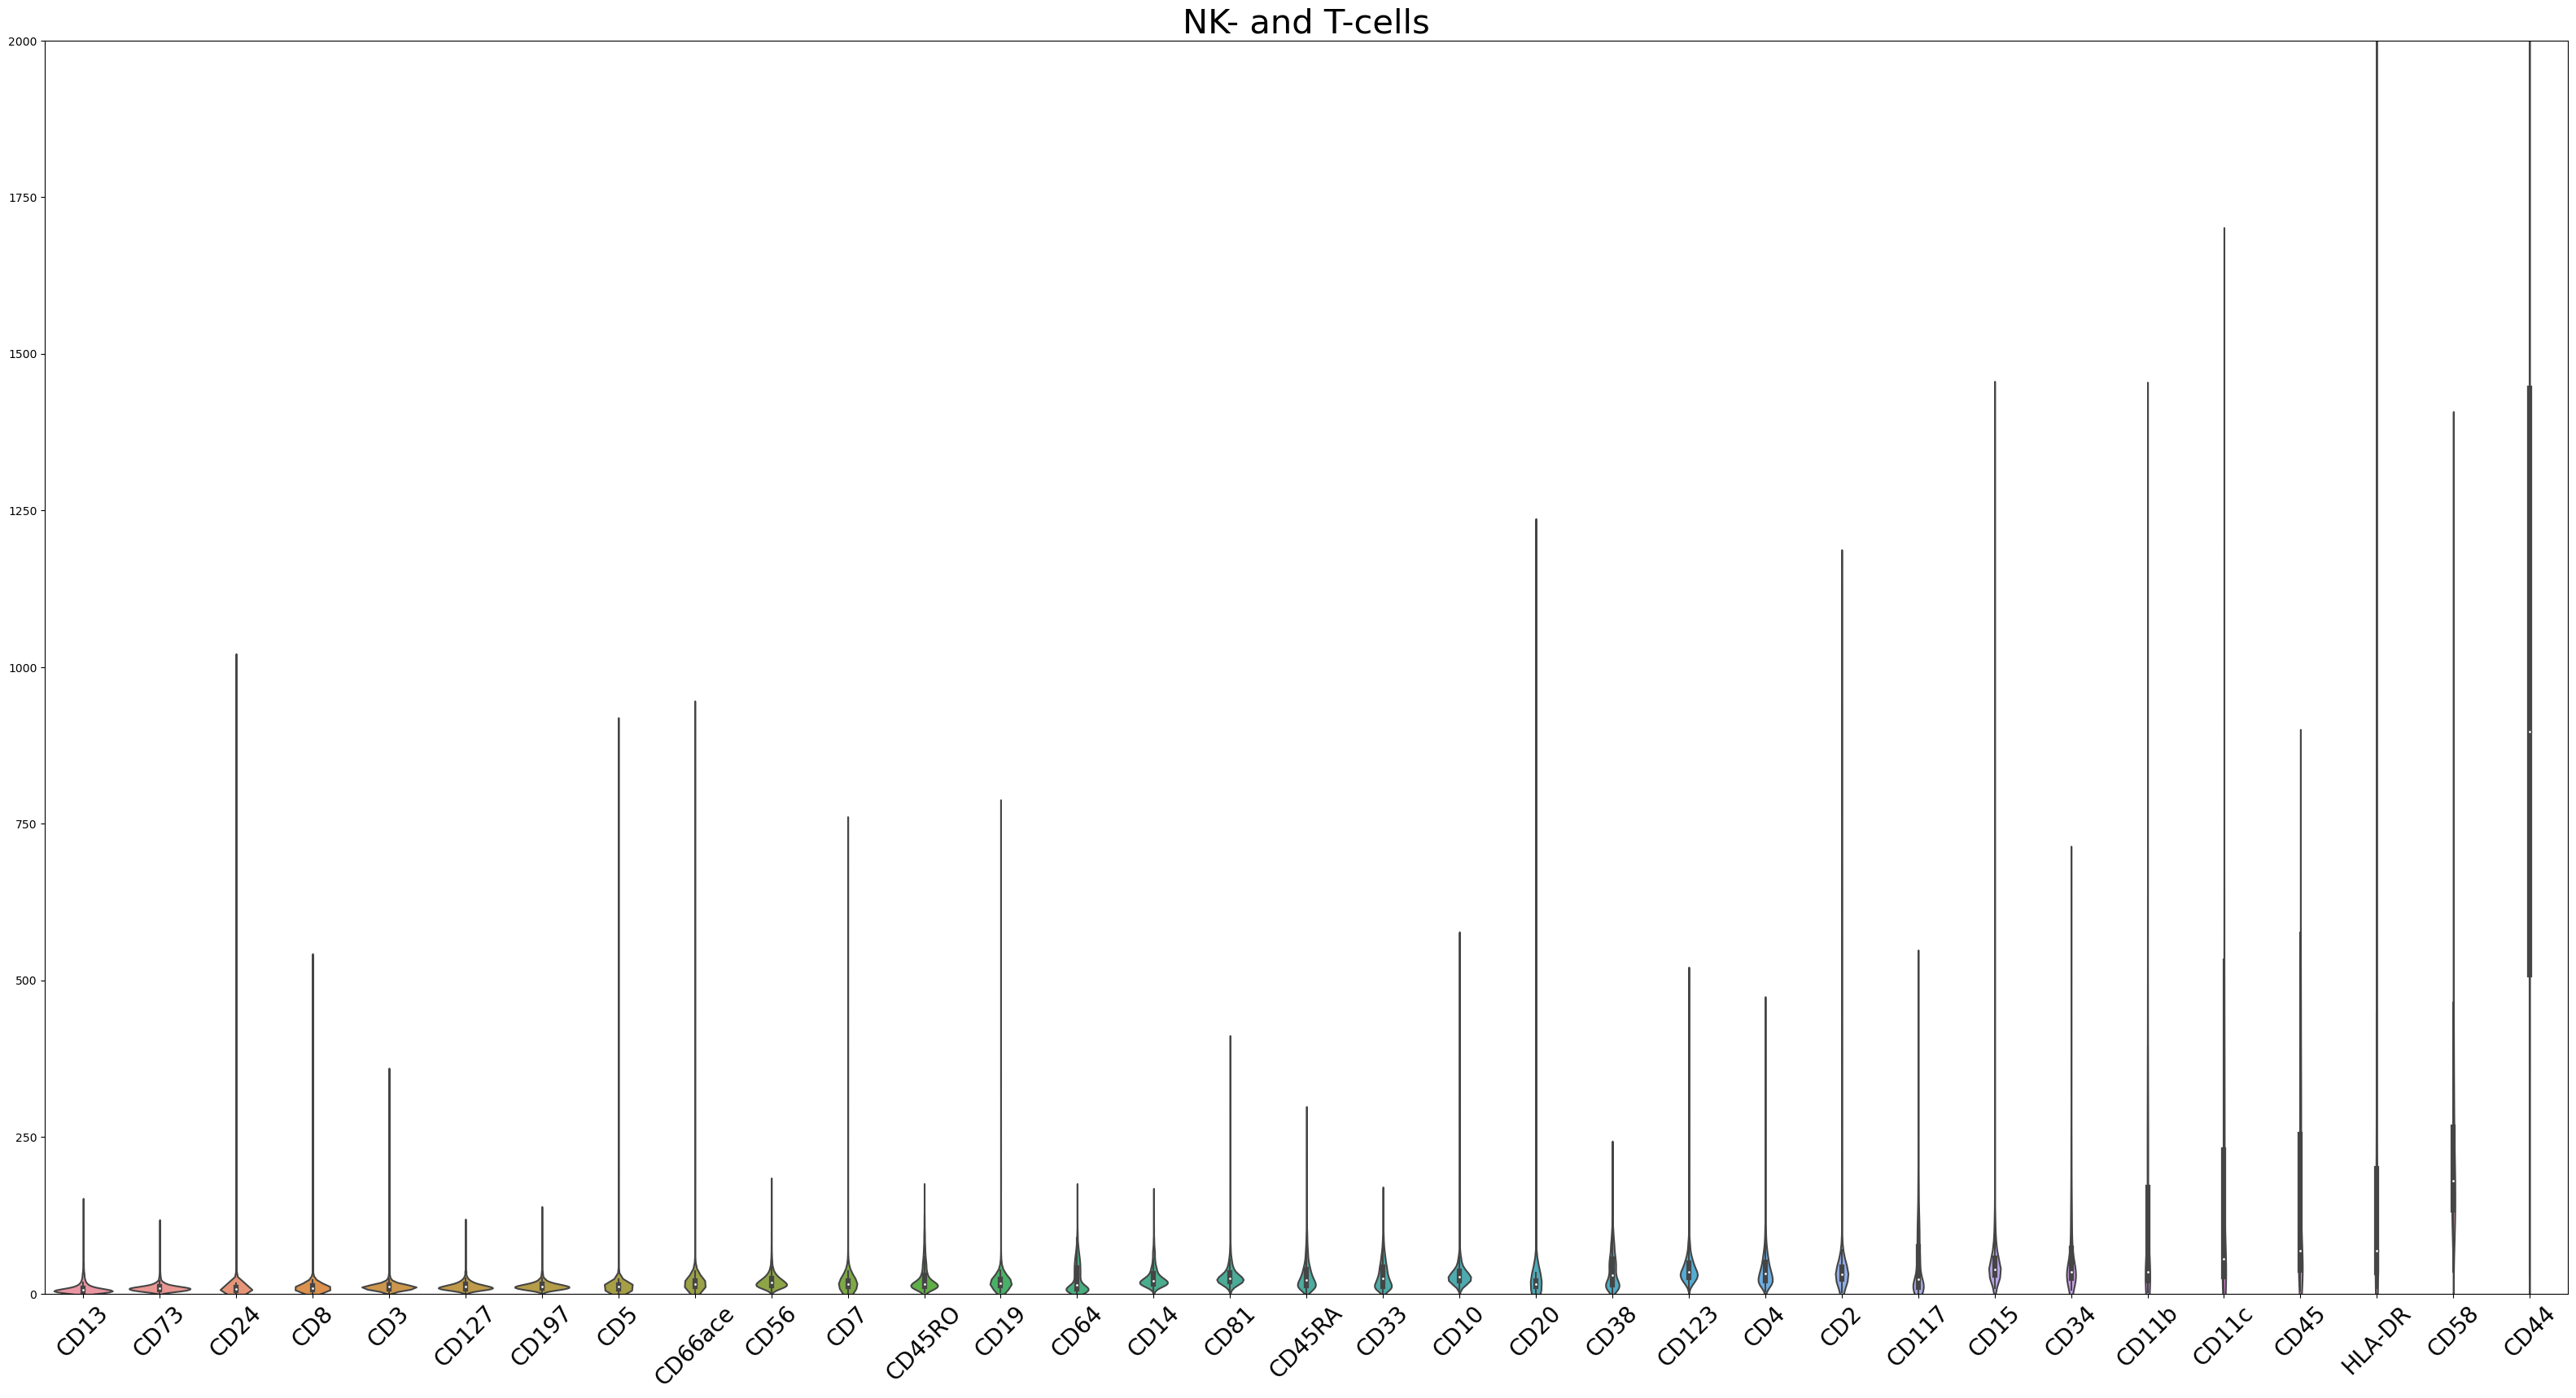

In [25]:
#NK- and T-cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 2000)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)



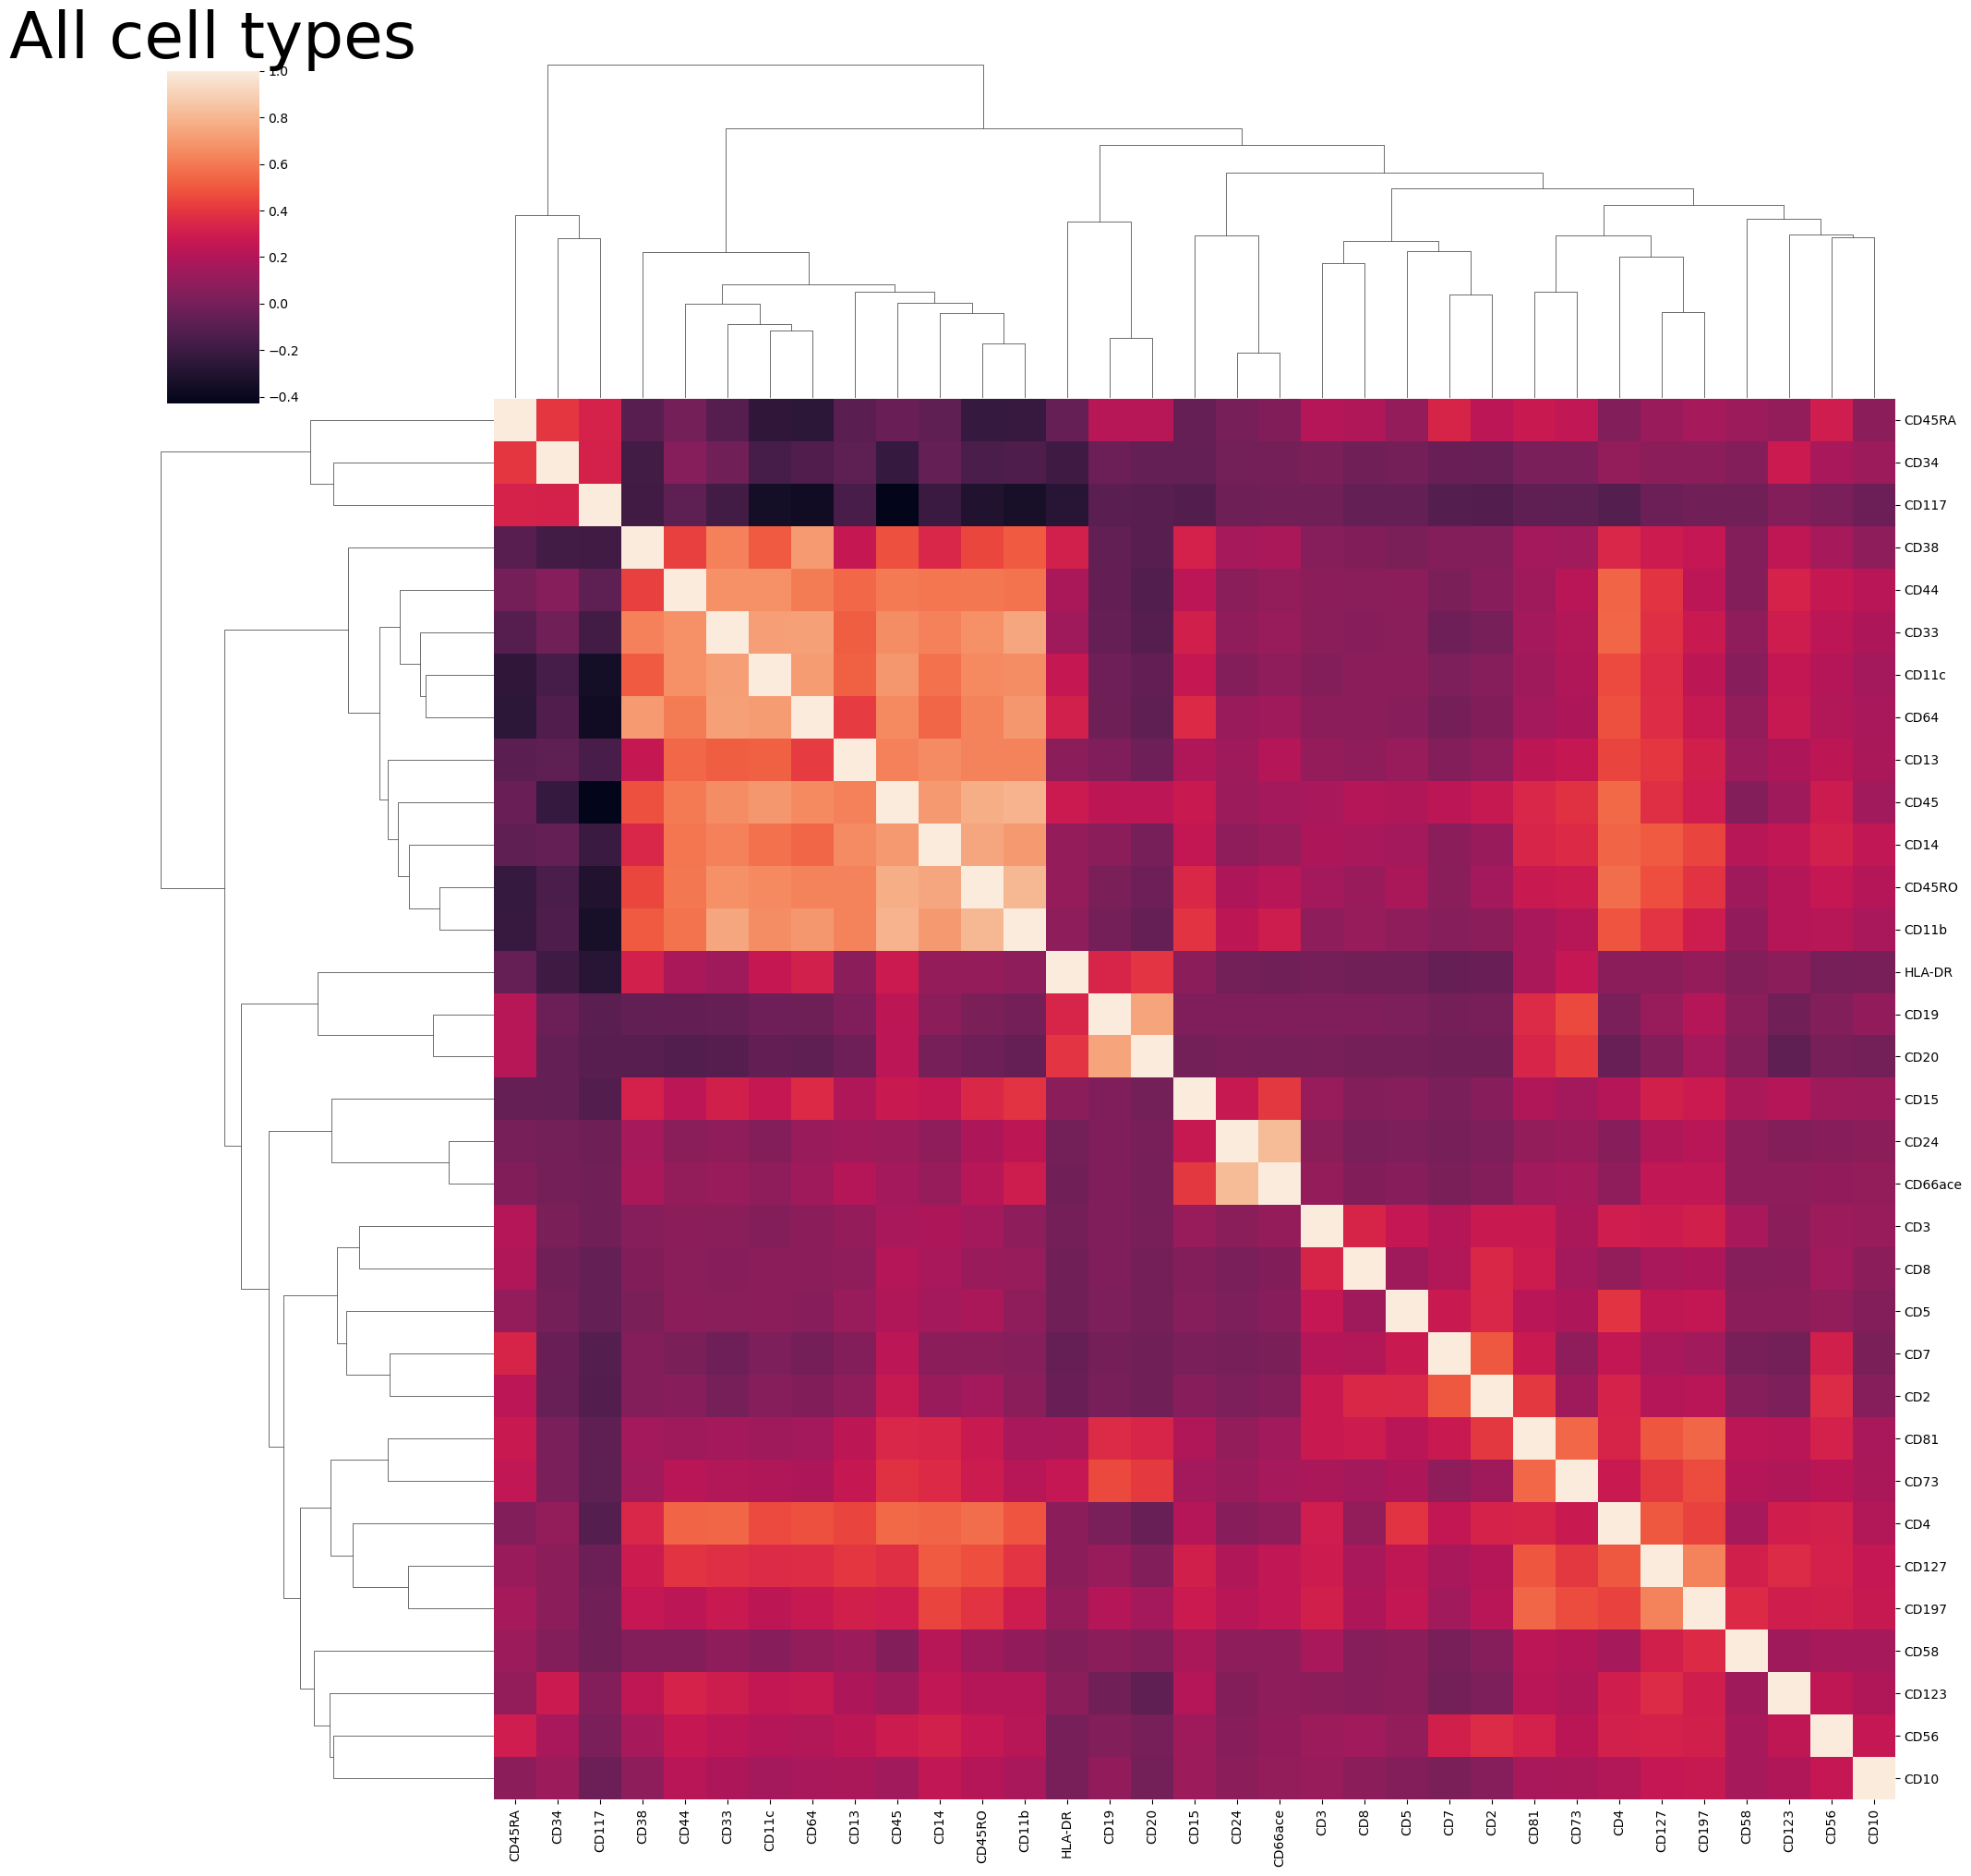

In [26]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



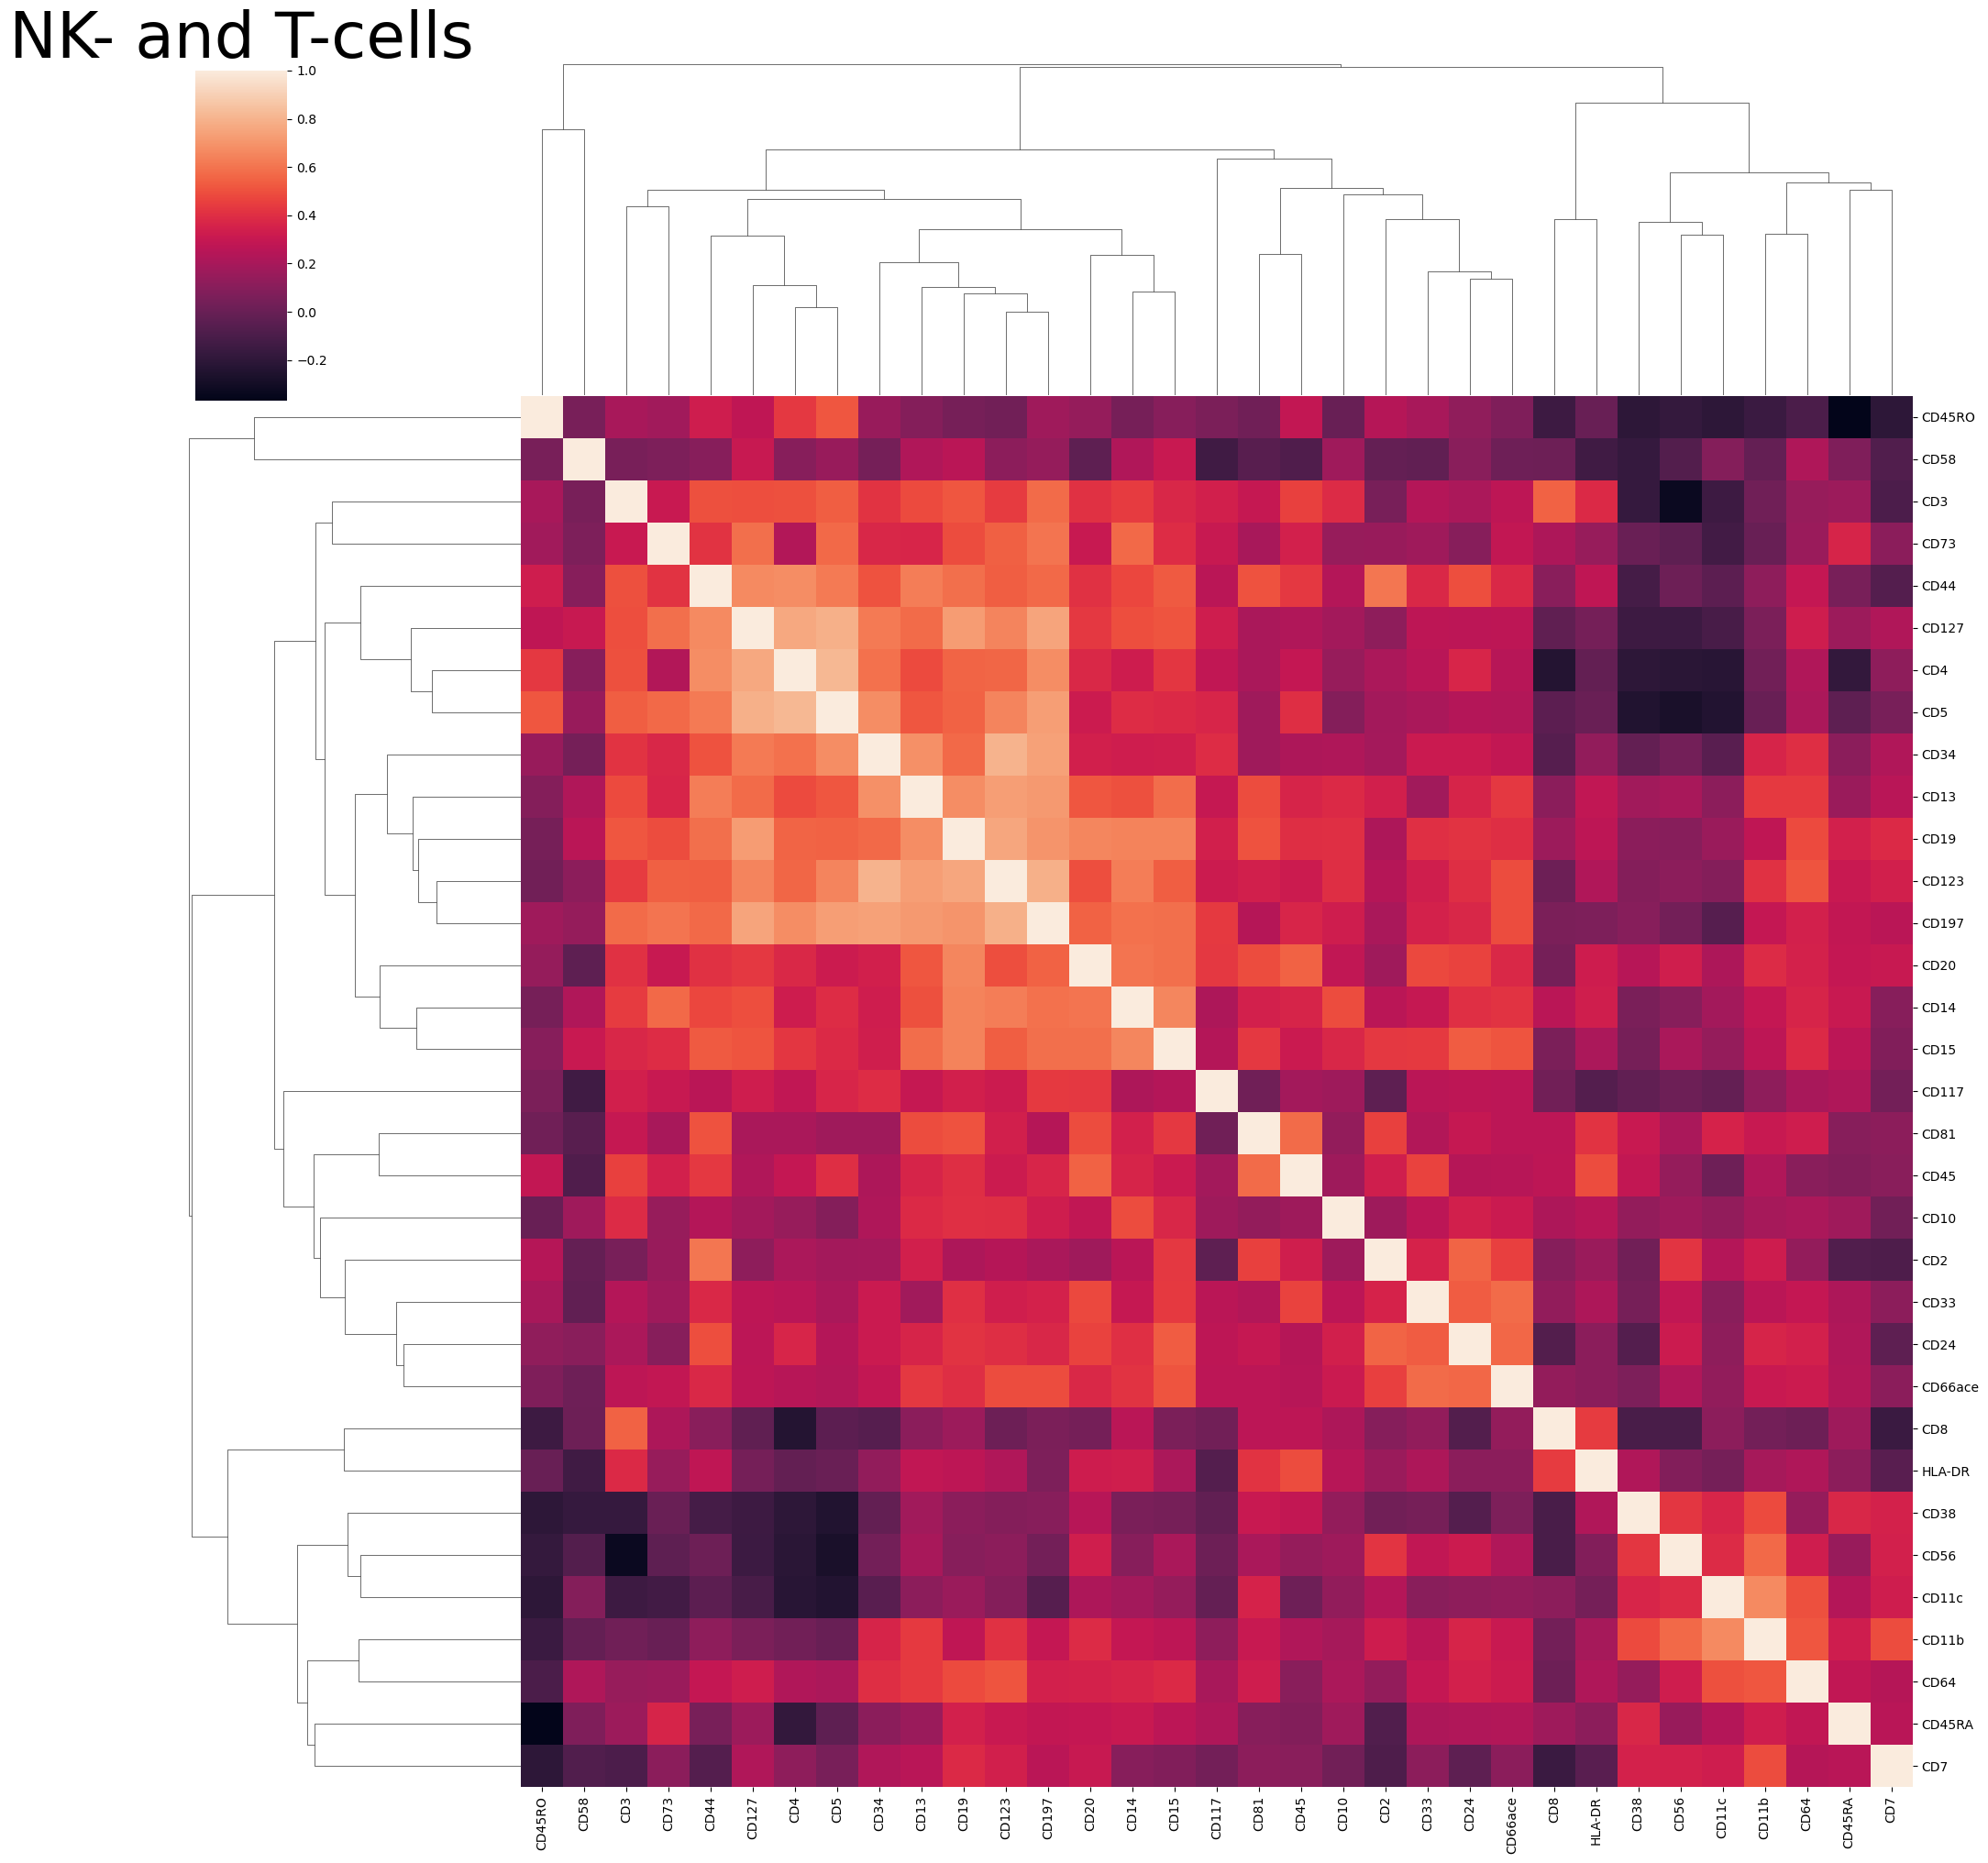

In [27]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK- and T-cells', fontsize = 50) ;


In [28]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 1734 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [29]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD38,CD127,CD45,CD73,CD197,CD34,CD10,CD15,CD117,CD66ace
AAACCTGAGCGATGAC-1-105,leukemic,2117,0.032469,0.176369,5205.0,NaN,NaN,NaN,NaN,False,...,76,7,149,8,11,26,38,46,15,10
AAACCTGCAGACACTT-1-105,leukemic,2773,0.141606,0.212001,8566.0,NaN,NaN,NaN,NaN,False,...,6,3,31,7,14,167,18,27,79,14
AAACCTGGTCCATCCT-1-105,leukemic,1078,0.072713,0.320563,2558.0,NaN,NaN,NaN,NaN,False,...,100,10,65,6,18,20,35,46,60,20
AAACCTGTCCGGGTGT-1-105,leukemic,2432,0.025701,0.289294,7743.0,NaN,NaN,NaN,NaN,False,...,39,6,81,5,15,24,30,52,8,16
AAACGGGAGTGTACGG-1-105,leukemic,2690,0.057902,0.195208,6511.0,NaN,NaN,NaN,NaN,False,...,16,8,70,15,8,64,40,54,24,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGATATAC-1-105,leukemic,2435,0.095709,0.313241,7084.0,NaN,NaN,NaN,NaN,False,...,12,13,54,5,5,16,22,31,88,7
TTTGTCAAGTACCGGA-1-105,leukemic,1976,0.047701,0.154011,4675.0,NaN,NaN,NaN,NaN,False,...,25,9,38,10,12,116,18,37,17,6
TTTGTCAAGTGGGATC-1-105,leukemic,1747,0.096144,0.230596,3994.0,NaN,NaN,NaN,NaN,False,...,5,6,36,10,15,127,365,43,8,12
TTTGTCACACAACGCC-1-105,leukemic,1314,0.128471,0.282369,2989.0,NaN,NaN,NaN,NaN,False,...,11,5,19,7,3,32,13,24,45,5


In [30]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 57 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [31]:
adata_nk.obs["CD56"]

AAGTCTGTCGCGATCG-1-105     35
ACGATGTCACAACGTT-1-105     50
ACGGGCTGTTAAAGTG-1-105     17
ACTTGTTGTCAAAGCG-1-105     62
ACTTTCATCGACCAGC-1-105    114
AGGTCCGGTCAGTGGA-1-105     18
AGTTGGTAGGCATTGG-1-105     37
ATCTACTAGTGATCGG-1-105     41
ATTGGTGTCAACACCA-1-105     14
CACCACTCACACCGAC-1-105     28
CACTCCATCTCAACTT-1-105     13
CAGCATAGTCCAGTGC-1-105     31
CAGTCCTAGGACGAAA-1-105     57
CATCCACAGAGGTACC-1-105     51
CCATGTCCAGCGAACA-1-105     32
CGAACATAGCAATATG-1-105     19
CGAACATAGTCACGCC-1-105     96
CGAATGTGTCTGCAAT-1-105     35
CGGCTAGAGCGCTTAT-1-105     16
CGGGTCAGTGCACCAC-1-105    124
CGGTTAATCACCCTCA-1-105     13
CGTGTCTTCAAGATCC-1-105     57
CTAACTTCAGCTATTG-1-105     53
CTAATGGGTTCACCTC-1-105     19
CTACATTGTCTCTCTG-1-105     18
CTACCCACAATCTACG-1-105     24
CTAGTGAAGGCTCATT-1-105     11
CTCAGAAAGCGTGAGT-1-105     61
GAATAAGTCAACACCA-1-105     42
GACCTGGCATCCAACA-1-105     32
GACGTTATCGCTTAGA-1-105     26
GAGCAGATCAATACCG-1-105     63
GCGACCAGTGTTGAGG-1-105     81
GGACAGACAT

In [32]:
#NK-cell markers

markers=["CD56"]

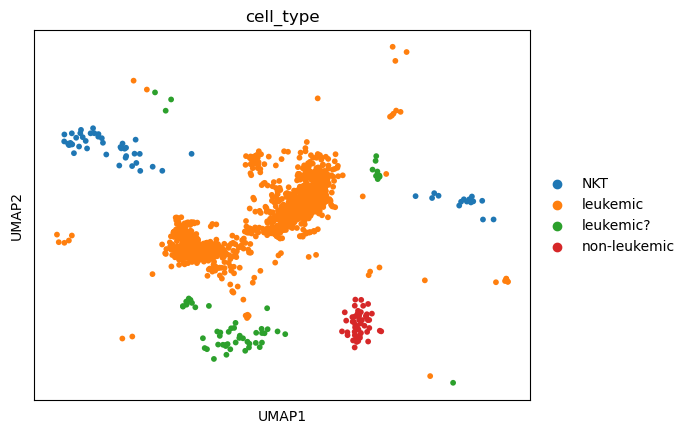

In [33]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

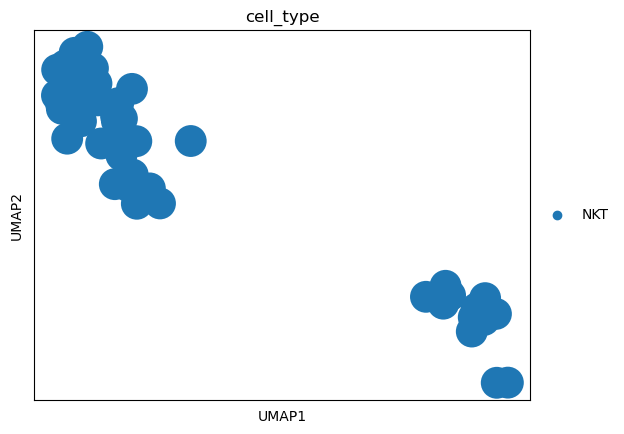

In [34]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

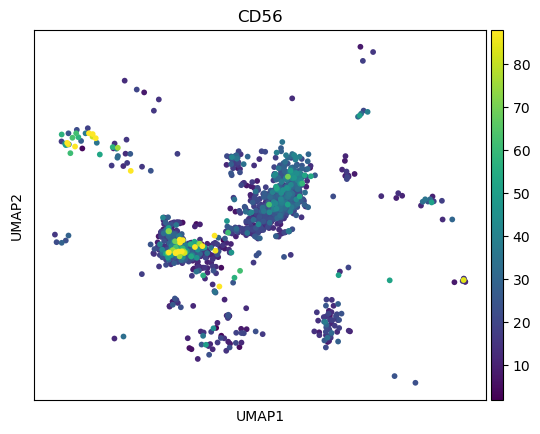

In [35]:
#All cell types

sc.pl.umap(adata_sample, color= markers,vmax="p99", color_map= 'viridis')

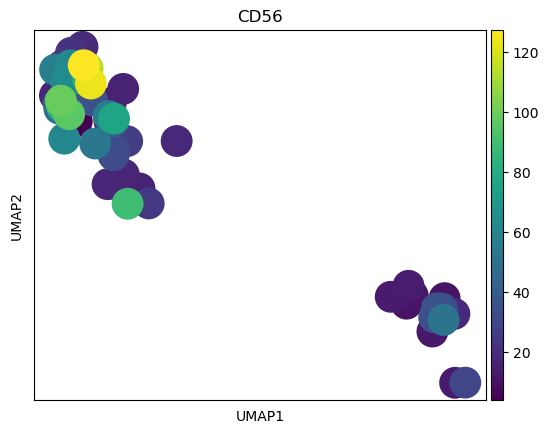

In [36]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = markers, vmax="p99", color_map = 'viridis')

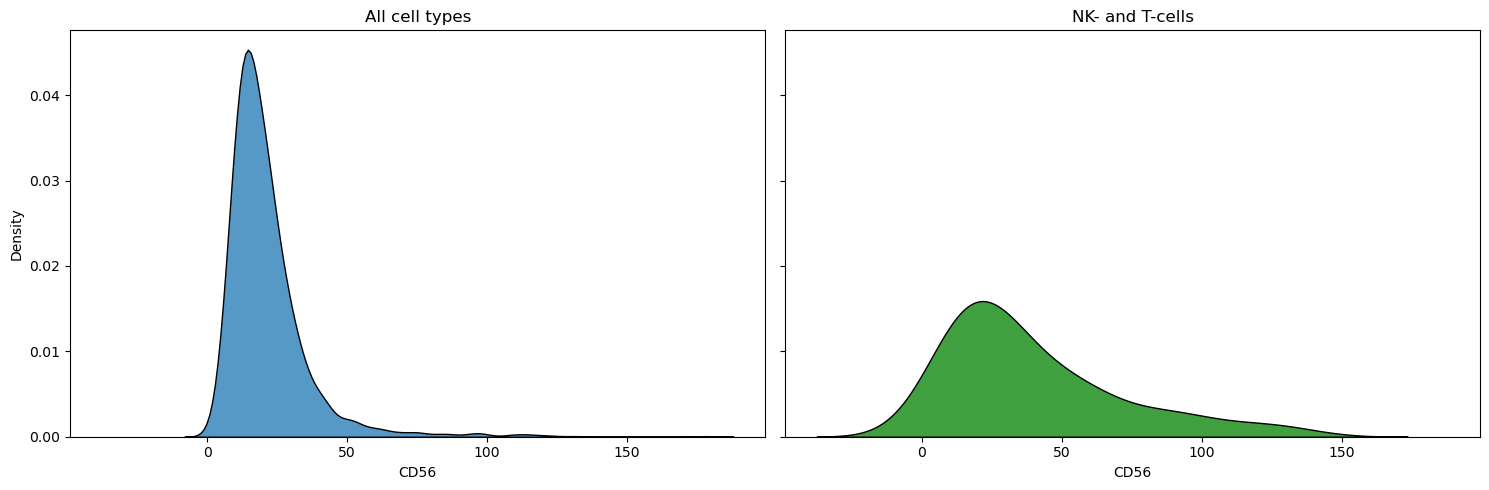

In [37]:
#NK and T-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK- and T-cells')
    
    plt.show()

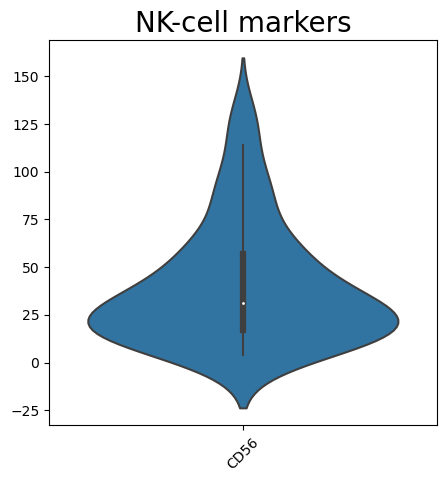

In [38]:
#NK markers

plt.figure(figsize=(5,5))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)
plt.title("NK-cell markers", fontsize=20)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)